# ACM20030 - Midterm 2 - 2023

This midterm exam starts at 1pm on Wednesday 15th of November and lasts **45 minutes**. Five additional minutes are given at the end for you to upload the Midterm2.ipynb to BrightSpace.

Save your notebook regularly as you are solving the problems.

I recommend you have a pen and paper handy to make small calculations (these do not need to be handed in).

The marks for each question are given in square brackets at the start of each question. The total marks for the test is 34.

You must complete the test indivudually. No contact with other class members, or anyone else, is allowed during the test.

You must complete the test indivudually. No contact with other class members, or anyone else, is allowed during the test. You are allowed to refer to the ACM20030-Examples notebooks (they must be saved on your laptop), your answers to previous assignments, and the lecture slides. You cannot view any other notebooks or files on your computer.

If there are any issues with uploading the midterm to BrightSpace please email me your completed Midterm2.ipynb immediately. My email address is niels.warburton@ucd.ie. Please include your student number if you email the test to me.

You **may not** use any other Python libraries other than NumPy and Matplotlib. 

## Checking you are in the exam room

Please enter the 4 digit number shown on the projector/board in the next cell

In [187]:
2997

2997

## Enter you student number

In [188]:
# Enter student number below
# 22380966

In [189]:
# Import NumPy, linalg and matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [190]:
# The below two lines set the default size and font size for matplotlib
plt.rcParams['figure.figsize'] = (16.0, 10.0)
plt.rcParams.update({'font.size': 22})

## Question 1: interpolation

In this question you should use the ``LagrangePoly`` function below

In [191]:
# For the arguements: 
#     x is the data point (or array of points) to evaluate the intepolating polynomial at
#     data is the data to be interpolated
# The function returns the y values of the interpolating polynomial
def LagrangePoly(x, data):
    n = data.shape[0] - 1
    i = 1
    fn = 0
    while i <= n + 1:
        j = 1
        Li = 1
        while j <= n+1:
            if(j == i):
                j += 1
                continue
            Li *= (x - data[j-1,0])/(data[i-1,0] - data[j-1,0])
            j += 1
        fn += data[i-1,1]*Li
        i += 1
    return fn

In [192]:
data = np.array([[0.2, 0.198669], [0.5, 0.479426], [1., 0.841471], [1.5, 0.997495], [2., 0.909297], [2.5, 0.598472]])

## Q1a [2 marks]

The above array contains data for a function sampled at 6 points.

Plot the above data using ``plt.scatter()``. Put a grid on your plot.

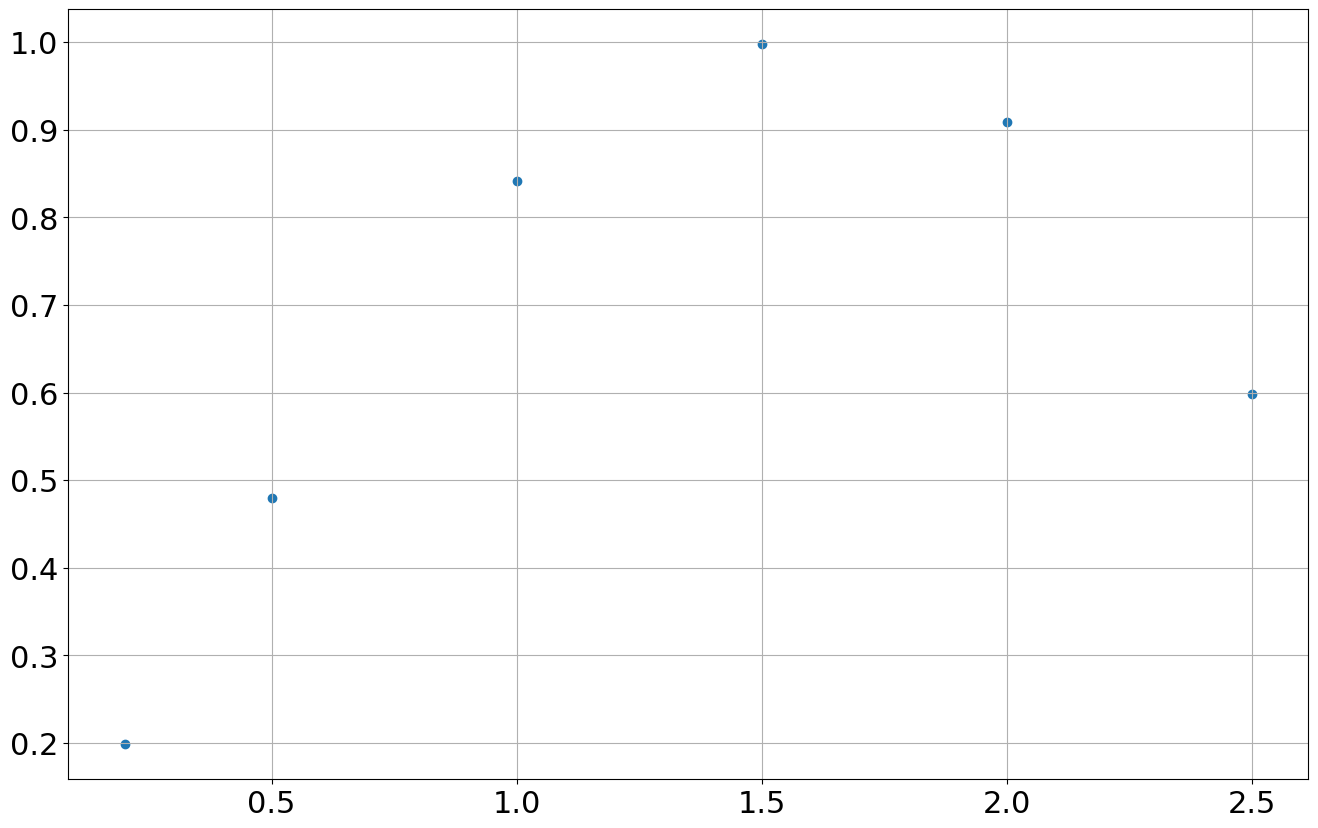

In [193]:
plt.scatter(data[:,0], data[:,1])
plt.grid()

## Q1b [5 marks]

Use the ``LagrangePoly()`` function to compute two quadratic polynomials over $x=0.2\dots2.5$ that:

- interpolate the first three data points
- interpolate the last three data points

Plot the resulting quadratic polynomials over the full range of the data and plot the data points on the same plot.

In [194]:
print(data[3:6])

[[1.5      0.997495]
 [2.       0.909297]
 [2.5      0.598472]]


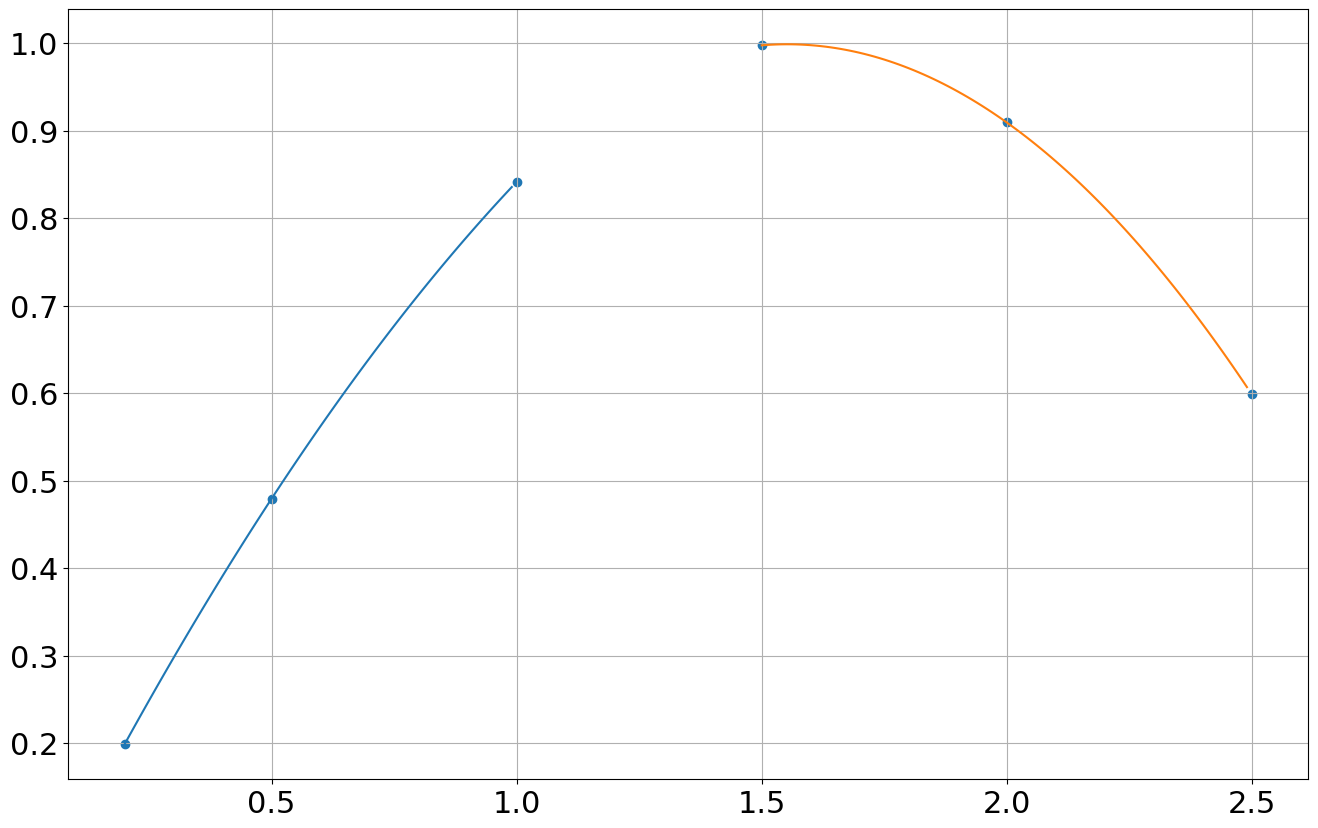

In [195]:
x1 = np.arange(0.2, 1, 0.01)
x2 = np.arange(1.5, 2.5, 0.01)
first3 = LagrangePoly(x1, data[0:3])
last3 = LagrangePoly(x2, data[3:6])

x= np.arange(0.2, 2.5, 0.01)

plt.plot(x1, first3)
plt.scatter(data[:,0], data[:,1])
plt.plot(x2, last3)
plt.grid()
plt.show()

# Q1c [2 marks]

Which of the two polynomials should you use to estimate the value of the the original function at $x=1.7$? State why you have made this choice and then estimate the function at $x=1.7$.

In [196]:
# I would use the second fit, or interpolating over the last 3 points of data because that fit contains the poitn x=1.7, we estimate it as y = 0.97

In [201]:
y= 0.96

0.6442879822608694


# Question 2: ordinary differential equations (ODEs)

In the lectures we looked at RK2 and RK4 Runge-Kutta methods for solving ordinary differential equations of the form

$$ y'(x) = f(x,y)$$

Below is the algorithm for an **RK3** method:

\begin{align}
    x_{i+1} &= x_i + \Delta x \\
    k_1 &= f(x_i, y_i) \\
    k_2 &= f\left(x_i + \tfrac{\Delta x}{2}, y_i + \tfrac{\Delta x}{2} k_1 \right) \\
    k_3 &= f\left(x_i + \Delta x, y_i + \Delta x(2k_2 - k_1) \right) \\
    y_{i+1} &= y_i + \tfrac{\Delta x}{6}(k_1 + 4 k_2 + k_3) 
\end{align}

## Q2a [2 marks]

Is this RK3 algorithm an explicit or implicit method? Justify your answer.

In [197]:
# Give you answer below
# RK3 is an explicit method because it extrpolated the next data point

## Q2b [5 marks]

Complete the code below to implement the RK3 method

In [198]:
def RK3Step(f, dx, xi, yi):
    xi1 = xi + dx
    k1 = f(xi,yi)
    k2 = f(xi+ dx/2, yi + dx*k1/2)
    k3 = f(xi+dx, yi+dx*(2*k2-k1))
    return yi + (dx/6)*(k1+4*k2+k3)


def RK3(f, dx, x0, y0, imax):
    xi = x0
    yi = y0
    i = 0

    steps = np.zeros((imax+1,2))
    steps[0,0] = x0
    steps[0,1] = y0
    
    stepper = RK3Step(f, dx, xi, yi)
    
    i = 0
    while i < imax:
        yi = stepper(f, dx, xi, yi)

        xi += dx
        i  += 1
        
        # Store the steps for plotting
        steps[i, 0] = xi
        steps[i, 1] = yi  


## Q2c [3 marks]

Test you RK3 function to find the solution, $y(x)$, at $x=1$ for the following ODE

$$y'(x) = -2x - y\quad\text{where}\quad y(0) = -1$$

Use 1000 steps to find the solution.

In [199]:
def firstorder(x,y):
    return -2*x-y

In [200]:
steps = RK3(firstorder, 0.1, 0, -1, 1000)
print(steps)

TypeError: 'float' object is not callable

## Q2d [2 marks]

Find the relative difference between you numerical solution at $x=1$ from the previous question and the true result given by the analytic solution to the ODE:

$$ y(x) = 2 - 3e^{-x} - 2x$$

In [ ]:
def exact(x):
    return 2-3*np.exp**(-x)-2*x

# Question 3 : numerical integration

Use the below `NIntegrate` function to answer the Q3 questions.

In [ ]:
def NIntegrate(f, a, b, N, method='Simpsons'):
    dx = (b-a)/N
    xi = a
    i = 0
    area = 0
    while i < N:
        if(method == 'Simpsons'):
            area += dx/6*(f(xi) + 4*f((2*xi+dx)/2) + f(xi+dx))
        elif(method == 'midpoint'):
            area += dx * f(xi+dx/2)
        elif(method == 'trapezoidal'):
            area += dx/2 * (f(xi) + f(xi+dx))
        xi += dx
        i+= 1
    return area

## Q3a [3 marks]

Numerically evaluate the following integral using the **midpoint** method with 1000 strips

$$\int_0^{\pi/2} \sin(2x)\,dx $$

Also compute the relative error with respect to the true integral whose value is $1$.

In [ ]:
def some(x):
    return np.sin(2*x)


awnser = NIntegrate(some, 0, np.pi/2, 1000, 'midpoint')
print(awnser)

In [ ]:
print(awnser - 1)

## Q3b [4 marks]

There is another form of Simpson's method known as the Simpson's 3/8ths rule. This rule gives the area for each strip as:

$$ I_i = \frac{\Delta x}{8} \left( f(x_i) + 3f\left(x_i + \tfrac{\Delta x}{3}\right) + 3f\left(x_i + \tfrac{2\Delta x}{3}\right) + f(x_i + \Delta x)  \right) $$

Complete the `NIntegrateSimpsons38` function below to implement the Simpson's 3/8ths.

Hint: you can copy most of the code you need from the NIntegrate function above.

In [ ]:
def NIntegrateSimpsons38(f, a, b, N):
    dx = (b-a)/N
    xi = a
    i = 0
    area = 0
    while i < N:
        area += (dx/8)*(f(xi)+3*f(xi+ dx/3)+3*f(xi+2*dx/3)+f(xi+dx))
        xi += dx
        i+= 1
    return area

## Q3c [2 marks]

Test your new method by evaluating the integral given in Q2a with 1000 strips. Compute the relative error with respect to the true answer. If your answer to part Q2b is correct you should find that your approximation to the integral is much more accurate than the result in Q2a computed using the midpoint method.

In [ ]:
awnser = NIntegrateSimpsons38(some, 0, np.pi/2, 1000)
print(awnser)
print(awnser - 1)


## Q3d [4 marks]

Let $h(x)$ be the following continous (but not smooth) function

$$ h(x) = \begin{cases} 
      \sin(x) & x \leq 0 \\
      -x^2 & 0\leq x \leq 1 \\
      -\cos(x-1) & x \geq 1 
   \end{cases} $$
   
Define a single function for $h(x)$ which internally may use `if`, `elif` and `else`. Then use the `NIntegrate` function to evaluate the following integral

$$ \int_{-1}^2 h(x)\, dx $$

using 3000 strips.

Hint: for full marks perform the integration over the three seperate regions and use 1000 strips per region.

In [ ]:
def h(x):
    if x <= 0:
        return np.sin(x)
    elif x >= 0 and x <= 1:
        return -x**2
    elif x >= 1:
        return -np.cos(x-1)


In [ ]:
region1 = NIntegrate(h, -1, 0, 1000)
region2 = NIntegrate(h, 0, 1, 1000)
region3 = NIntegrate(h, 1, 2, 1000)

print(region1+region2+region3)

# Submission

You must upload your completed `Midterm2.ipynb` to BrightSpace. You can find the place to upload the file under the Assessments Tab -> Midterm2. I also recommend you commit and push your midterm to your GitHub repository.

If there are any issues with uploading the midterm to BrightSpace. Please email me your completed Midterm2.ipynb. My email address is niels.warburton@ucd.ie. 